In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/software-engineer-salaries-tr-2025/dataset_realistic.csv


In [2]:
df = pd.read_csv('/kaggle/input/software-engineer-salaries-tr-2025/dataset_realistic.csv')

# **Summary information about the dataset and visualisation of general distributions.**

In [3]:


plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12


print("📈 Dataset Özet Bilgileri:")
print(f"Toplam kayıt sayısı: {len(df):,}")
print(f"Sütun sayısı: {len(df.columns)}")
print(f"\nSütunlar: {list(df.columns)}")

print("\n🔍 İlk 5 kayıt:")
print(df.head())

# Veri seti genel bilgileri
print("📊 Veri Seti Genel Bilgileri:")
print("="*50)

print(f"\n🏙️ Şehir dağılımı:")
city_dist = df['Şehir'].value_counts()
for city, count in city_dist.items():
    percentage = (count/len(df))*100
    print(f"  {city}: {count:,} (%{percentage:.1f})")

print(f"\n👥 Seviye dağılımı:")
level_dist = df['Seviye'].value_counts()
for level, count in level_dist.items():
    percentage = (count/len(df))*100
    print(f"  {level}: {count:,} (%{percentage:.1f})")

print(f"\n💼 Pozisyon sayısı: {df['Pozisyon'].nunique()}")
print(f"💰 Maaş aralığı: {df['Maaş_Net_TL'].min():,}₺ - {df['Maaş_Net_TL'].max():,}₺")
print(f"📊 Ortalama maaş: {df['Maaş_Net_TL'].mean():,.0f}₺")

📈 Dataset Özet Bilgileri:
Toplam kayıt sayısı: 1,000
Sütun sayısı: 4

Sütunlar: ['Şehir', 'Seviye', 'Pozisyon', 'Maaş_Net_TL']

🔍 İlk 5 kayıt:
      Şehir  Seviye      Pozisyon  Maaş_Net_TL
0    Ankara     Mid  Data Science       102000
1  Istanbul     Mid     Fullstack        75000
2  Istanbul  Junior       Backend        48000
3     Diğer     Mid  Data Science        83000
4    Ankara  Junior       QA/Test        52000
📊 Veri Seti Genel Bilgileri:

🏙️ Şehir dağılımı:
  Istanbul: 566 (%56.6)
  Diğer: 186 (%18.6)
  Ankara: 171 (%17.1)
  Izmir: 77 (%7.7)

👥 Seviye dağılımı:
  Junior: 464 (%46.4)
  Mid: 337 (%33.7)
  Senior: 199 (%19.9)

💼 Pozisyon sayısı: 15
💰 Maaş aralığı: 29,000₺ - 210,000₺
📊 Ortalama maaş: 76,211₺


# **Average salaries by position and statistical values for these positions.**

💼 Pozisyon Bazlı Maaş İstatistikleri (TL):
                             Kayıt_Sayısı  Ortalama   Medyan  Std_Sapma  \
Pozisyon                                                                  
Data Engineer                          15  105933.0  80000.0    46619.0   
Data Science                           72   90417.0  81000.0    34812.0   
Machine Learning                       47   88915.0  72000.0    35688.0   
Embedded Software Developer             6   87000.0  85000.0    19453.0   
Cybersecurity                          42   84714.0  81000.0    33107.0   
Mobile                                 64   82297.0  79500.0    41647.0   
DevOps                                 56   80143.0  71500.0    31796.0   
Backend                               198   78742.0  69000.0    33938.0   
Fullstack                             113   76637.0  67000.0    31255.0   
QA/Test                                75   76600.0  74000.0    25400.0   
Frontend                              172   69326.0  6000

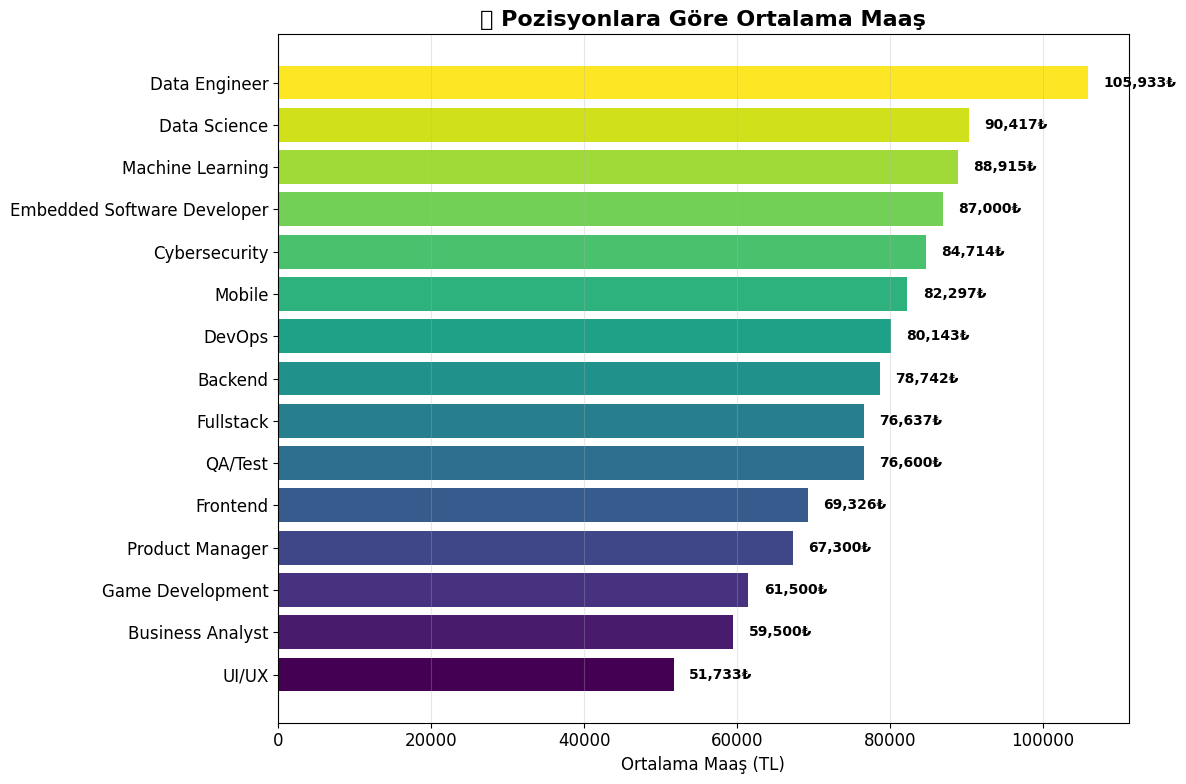

In [4]:
position_stats = df.groupby('Pozisyon')['Maaş_Net_TL'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(0)

position_stats.columns = ['Kayıt_Sayısı', 'Ortalama', 'Medyan', 'Std_Sapma', 'Min', 'Max']
position_stats = position_stats.sort_values('Ortalama', ascending=False)

print("💼 Pozisyon Bazlı Maaş İstatistikleri (TL):")
print("="*80)
print(position_stats)

# Ortalama maaş grafiği
fig, ax1 = plt.subplots(figsize=(12, 8))

position_avg = df.groupby('Pozisyon')['Maaş_Net_TL'].mean().sort_values(ascending=True)

bars1 = ax1.barh(position_avg.index, position_avg.values, 
                color=plt.cm.viridis(np.linspace(0, 1, len(position_avg))))
ax1.set_title('💰 Pozisyonlara Göre Ortalama Maaş', fontsize=16, fontweight='bold')
ax1.set_xlabel('Ortalama Maaş (TL)', fontsize=12)
ax1.grid(axis='x', alpha=0.3)

for i, (bar, value) in enumerate(zip(bars1, position_avg.values)):
    ax1.text(value + 2000, i, f'{value:,.0f}₺', 
             va='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()


# **Average salary values according to the experience level of the positions.**

🎯 Pozisyon ve Seviye Bazlı Ortalama Maaşlar (TL):
Seviye                        Junior       Mid    Senior
Pozisyon                                                
Data Engineer                68667.0  114400.0  151250.0
Mobile                       45857.0   90583.0  150750.0
Data Science                 61719.0   93042.0  143875.0
Machine Learning             59409.0   93929.0  141545.0
Cybersecurity                56053.0   96125.0  136429.0
Backend                      52231.0   85319.0  134143.0
DevOps                       54857.0   90706.0  128182.0
Fullstack                    51265.0   75528.0  122464.0
Frontend                     48690.0   71357.0  119938.0
QA/Test                      54971.0   84037.0  114786.0
Product Manager              45833.0   72727.0   95571.0
Embedded Software Developer  69500.0   96333.0   94000.0
Game Development             45500.0   58182.0   91000.0
UI/UX                        43032.0   54895.0   72700.0
Business Analyst             58750.0  

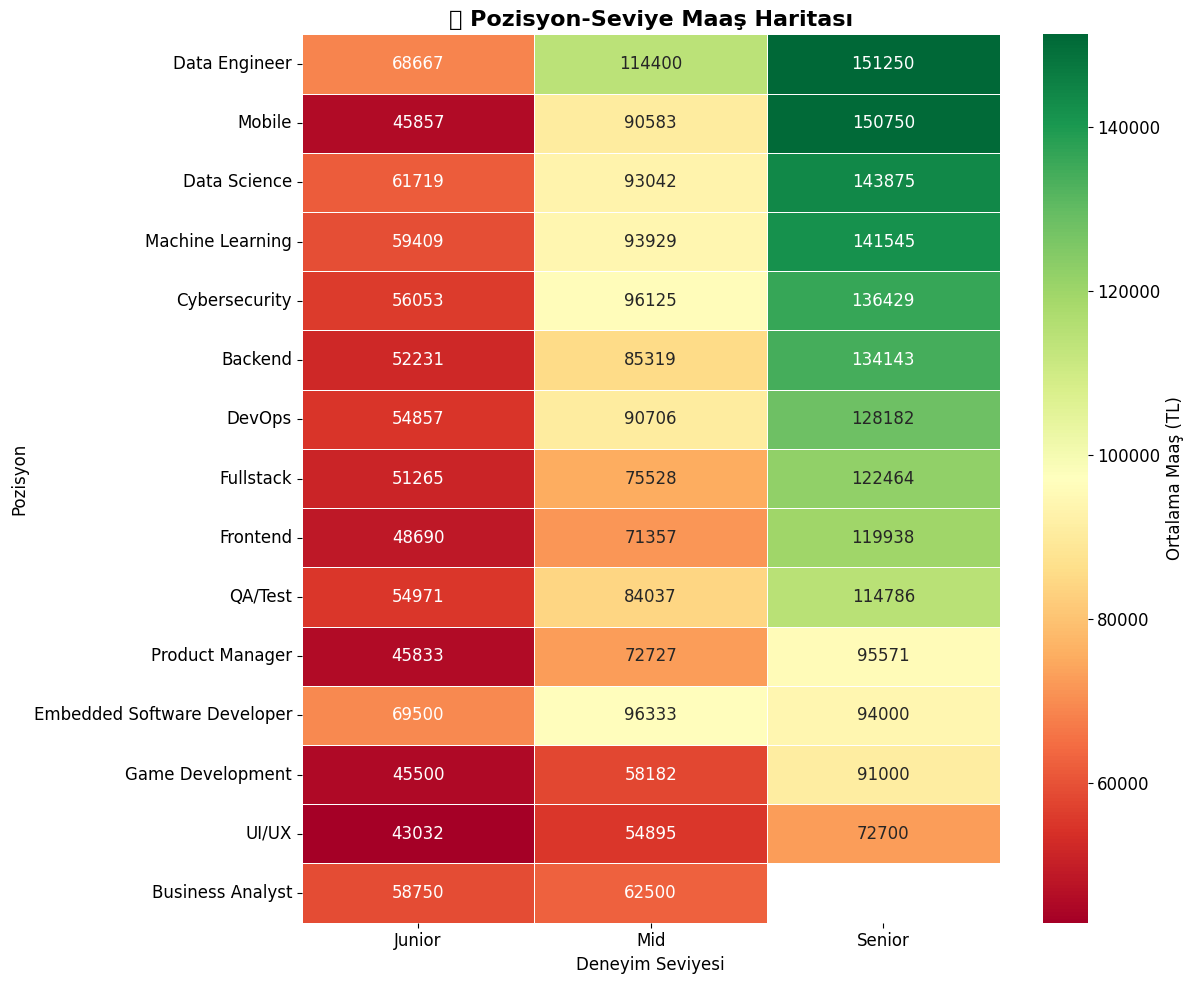

In [5]:

position_level_avg = df.groupby(['Pozisyon', 'Seviye'])['Maaş_Net_TL'].mean().unstack()
position_level_avg = position_level_avg.sort_values('Senior', ascending=False)

print("🎯 Pozisyon ve Seviye Bazlı Ortalama Maaşlar (TL):")
print("="*60)
print(position_level_avg.round(0))

plt.figure(figsize=(12, 10))
sns.heatmap(position_level_avg, 
            annot=True, 
            fmt='.0f',
            cmap='RdYlGn',
            cbar_kws={'label': 'Ortalama Maaş (TL)'},
            linewidths=0.5)

plt.title('🔥 Pozisyon-Seviye Maaş Haritası', fontsize=16, fontweight='bold')
plt.xlabel('Deneyim Seviyesi', fontsize=12)
plt.ylabel('Pozisyon', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

career_growth = position_level_avg.copy()
career_growth['Junior_to_Mid'] = ((career_growth['Mid'] - career_growth['Junior']) / career_growth['Junior'] * 100)
career_growth['Mid_to_Senior'] = ((career_growth['Senior'] - career_growth['Mid']) / career_growth['Mid'] * 100)
career_growth['Junior_to_Senior'] = ((career_growth['Senior'] - career_growth['Junior']) / career_growth['Junior'] * 100)

